# import Library


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

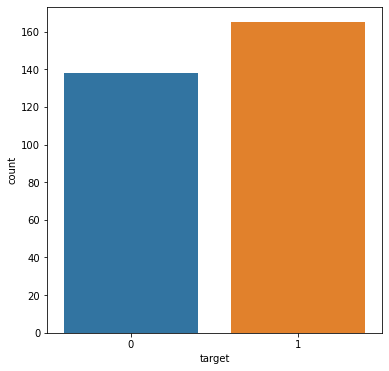

In [7]:
plt.figure(figsize=(6,6))
sbn.countplot(
    x="target",
    data=df
    )

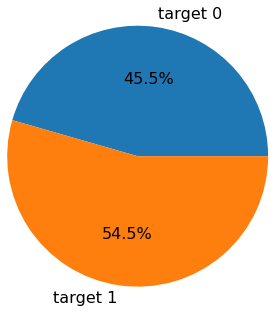

In [8]:
df_target = df.groupby("target").size()
df_target
plt.pie(df_target.values, labels = ["target 0", "target 1"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

In [9]:
df_sex = df.groupby(["sex","target"]).size()
df_sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

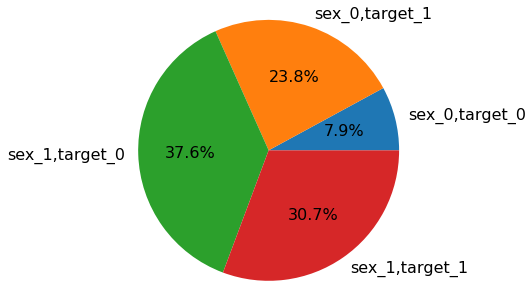

In [10]:
plt.pie(df_sex.values, labels = ["sex_0,target_0", "sex_0,target_1", "sex_1,target_0", "sex_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

# ডাটা এনালাইসিস

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.isin([0]).any().any()

True

In [13]:
 0 in df.values


True

In [14]:
df.eq(0).any().any()
Out[173]: True

In [15]:
missing_value = (df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]==0).sum()

In [16]:
missing_value

age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         258
restecg     147
thalach       0
exang       204
oldpeak      99
slope        21
ca          175
thal          2
dtype: int64

In [17]:
df.shape

(303, 14)

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Data visualization

<AxesSubplot:>

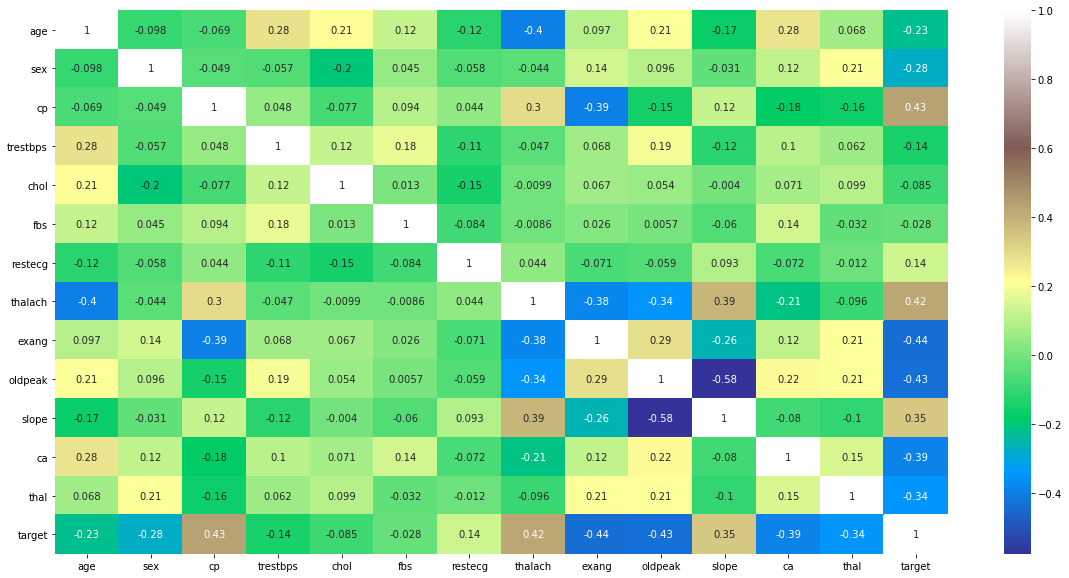

In [21]:
plt.figure(figsize=(20,10))
sbn.heatmap(df.corr(), annot = True, cmap = 'terrain')

<AxesSubplot:xlabel='year', ylabel='month'>

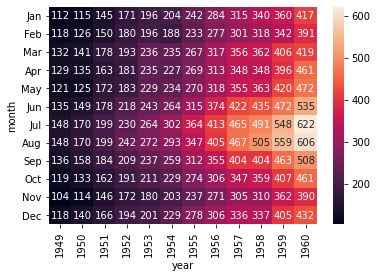

In [22]:
flights = sbn.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
sbn.heatmap(flights, annot=True, fmt="d")

<AxesSubplot:>

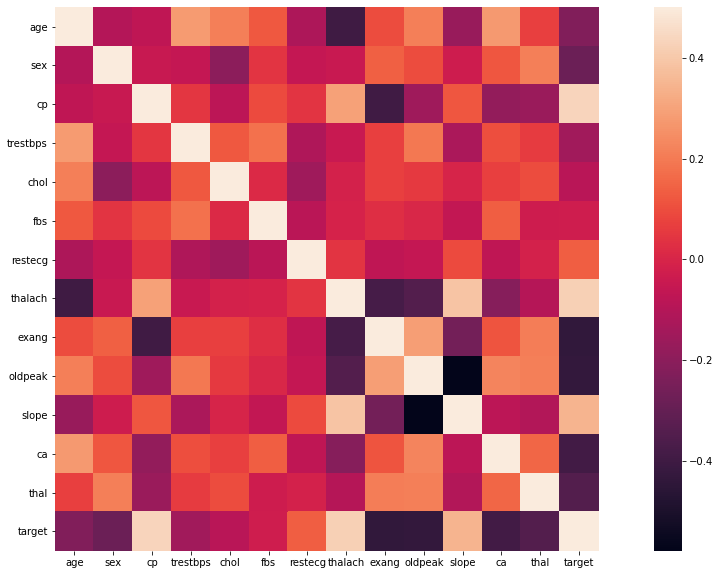

In [23]:
plt.figure(figsize=(20,10))
sbn.heatmap(df.corr(), vmax=.50, square=True)

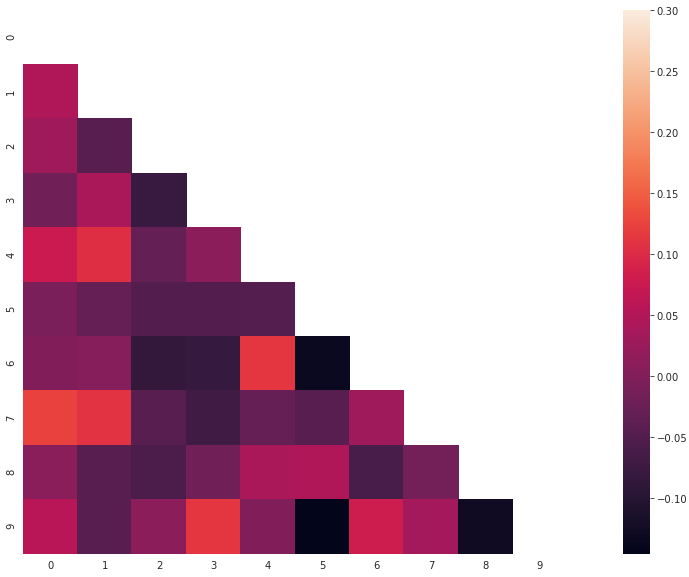

In [24]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sbn.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sbn.heatmap(corr, mask=mask, vmax=.3, square=True)

<AxesSubplot:xlabel='target', ylabel='count'>

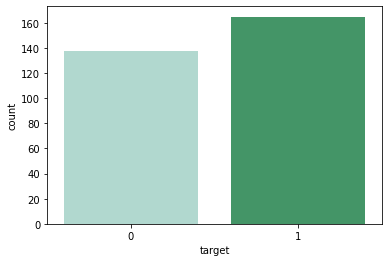

In [25]:
sbn.countplot(x='target', palette = 'BuGn', data=df)

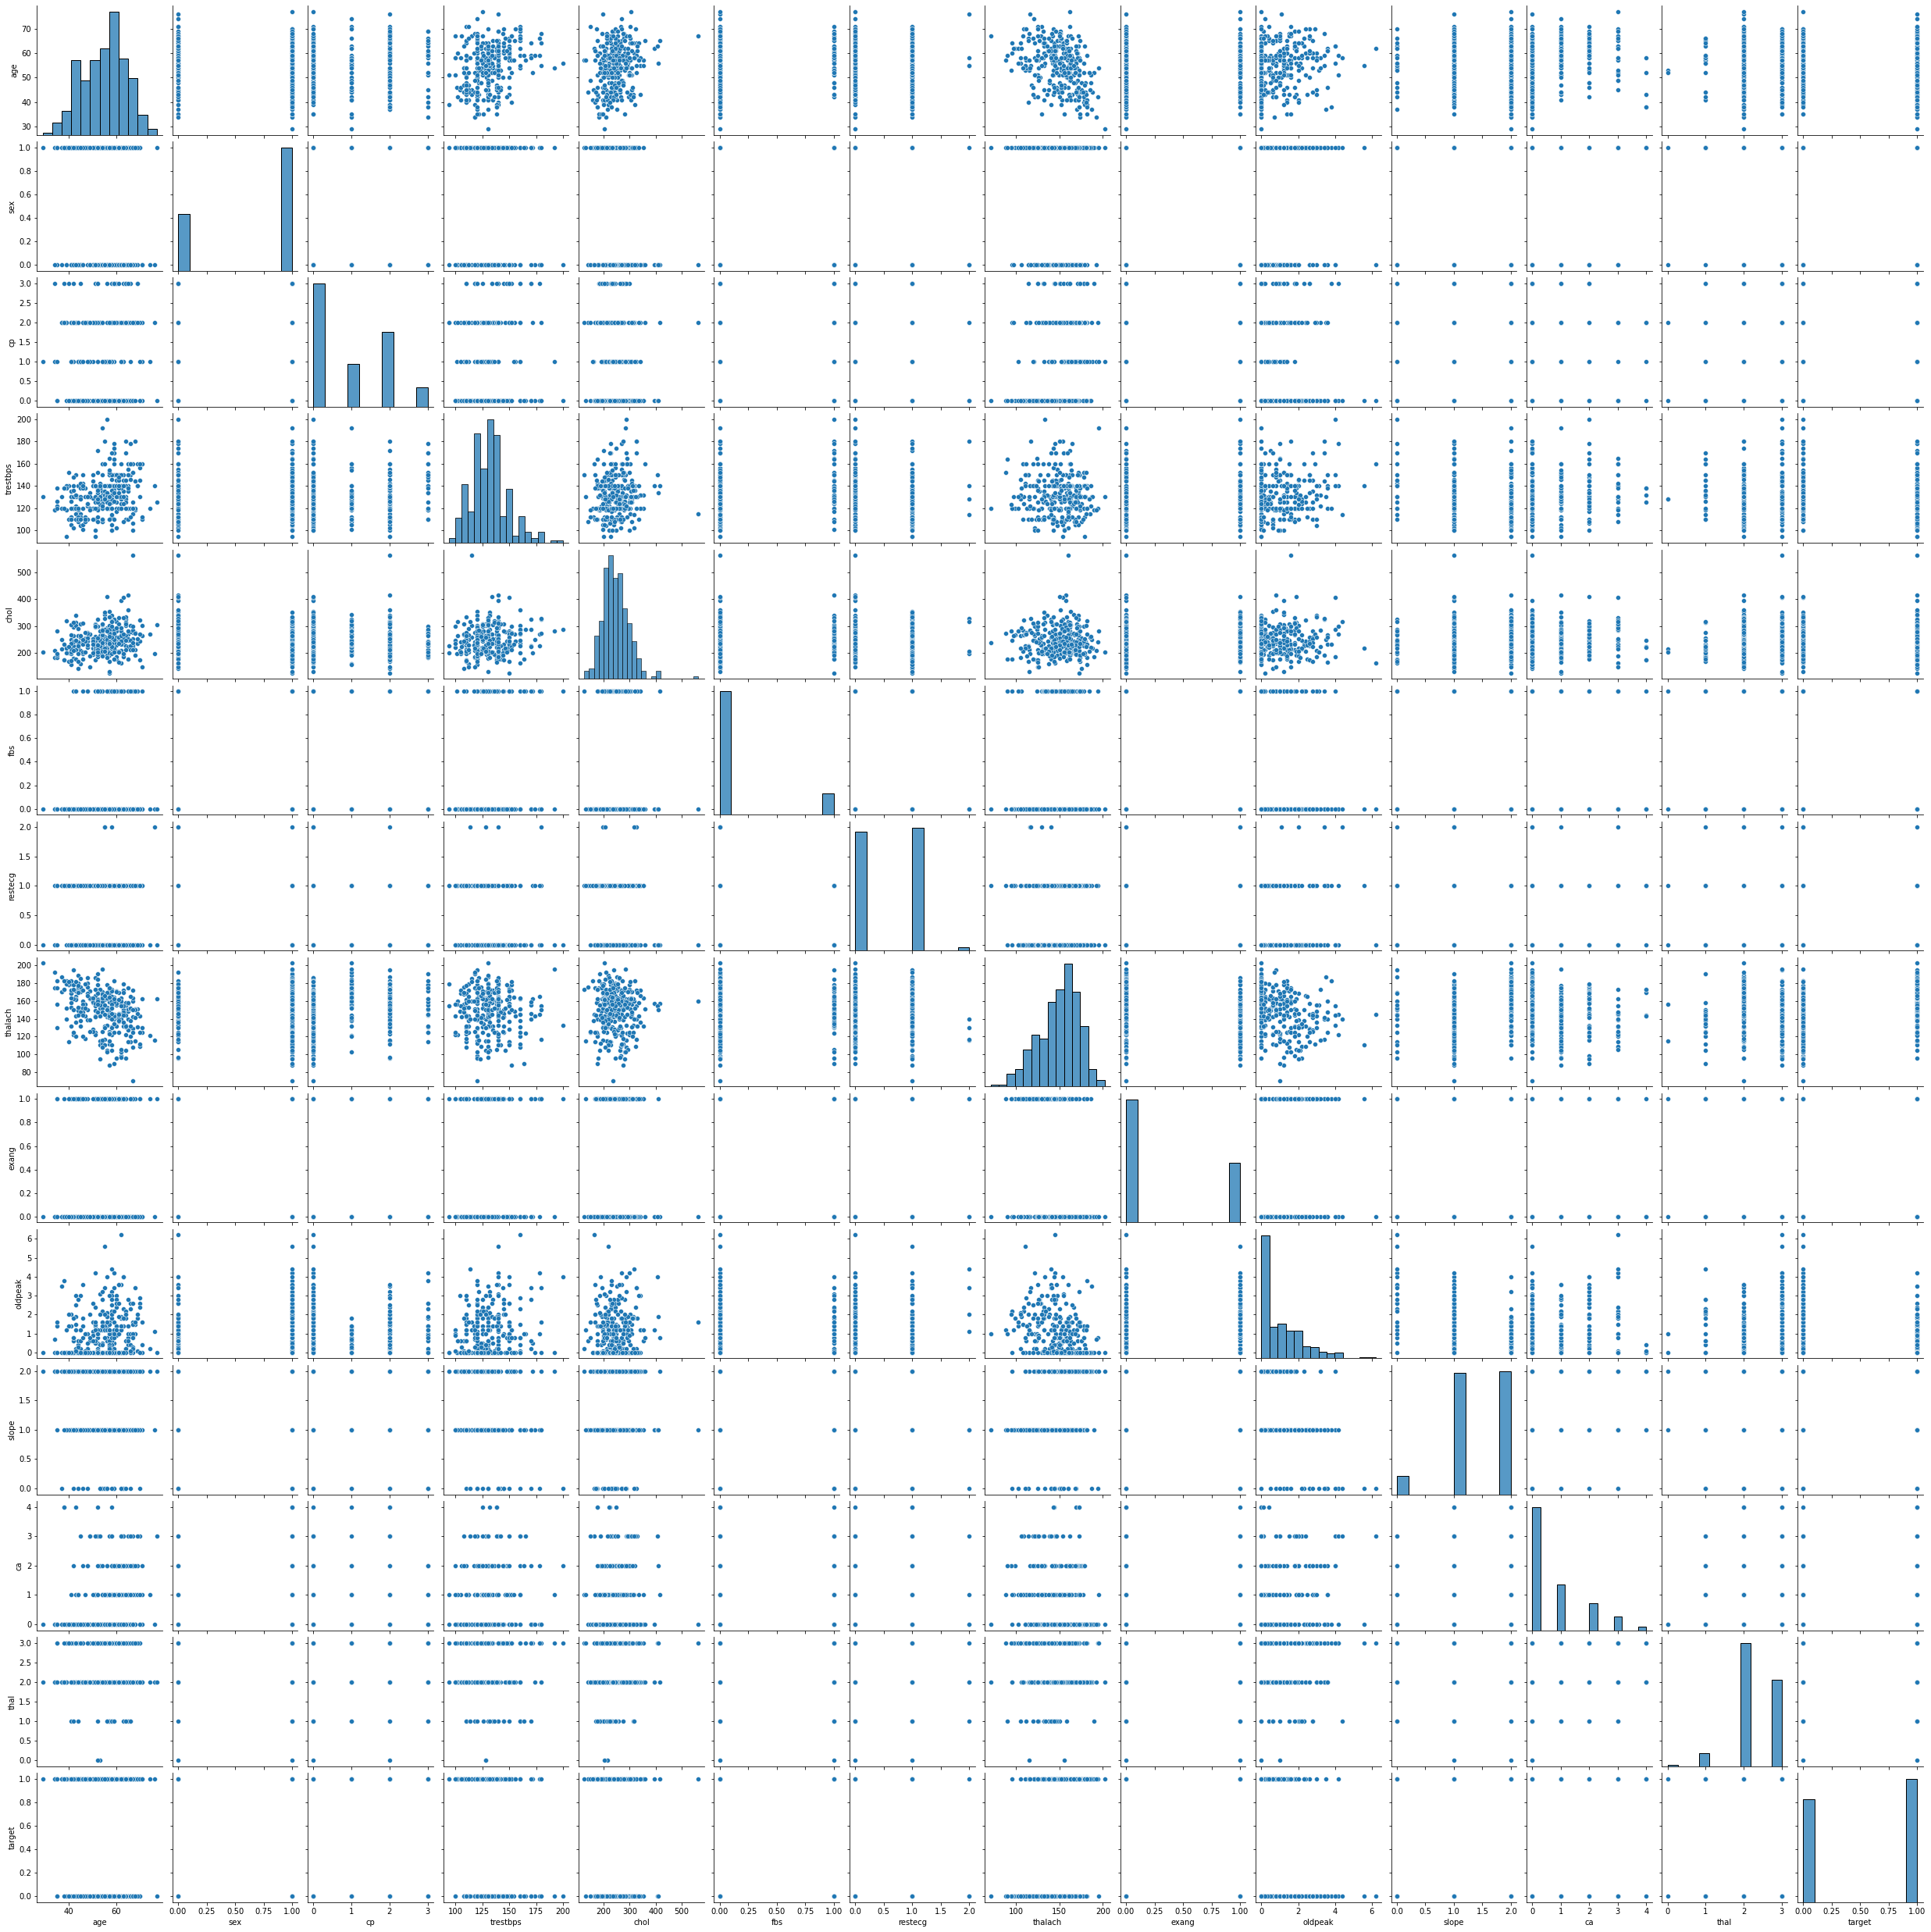

In [26]:
sbn.pairplot(data=df)

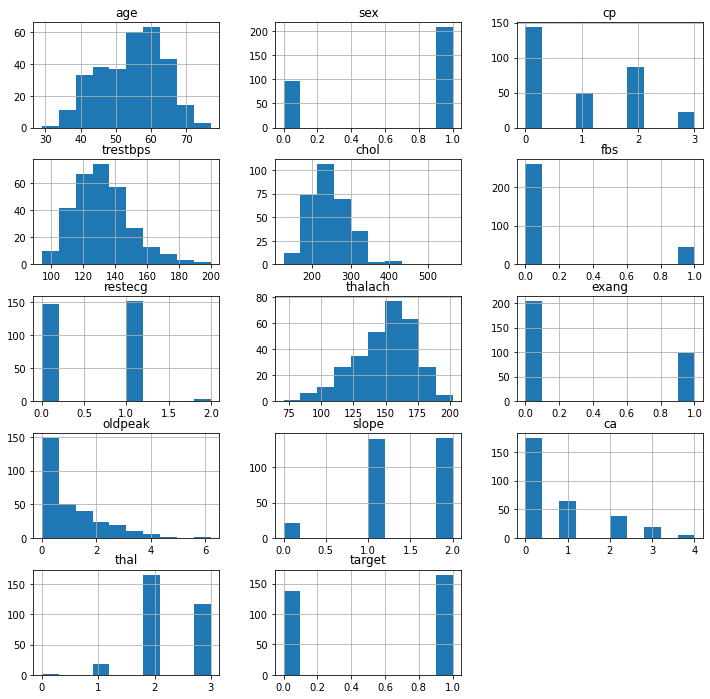

In [27]:
df.hist(figsize=(12,12), layout=(5,3));

# ডাটা প্রিপ্রসেসিং

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = MinMaxScaler.fit_transform(df[columns_to_scale])

In [29]:
df[columns_to_scale]

,age,trestbps,chol,thalach,oldpeak
0,0.708333,0.481132,0.244292,0.603053,0.370968
1,0.166667,0.339623,0.283105,0.885496,0.564516
2,0.250000,0.339623,0.178082,0.770992,0.225806
3,0.562500,0.245283,0.251142,0.816794,0.129032
4,0.583333,0.245283,0.520548,0.702290,0.096774
...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258
299,0.333333,0.150943,0.315068,0.465649,0.193548
300,0.812500,0.471698,0.152968,0.534351,0.548387
301,0.583333,0.339623,0.011416,0.335878,0.193548


In [30]:
x = df.drop(['target'], axis=1)
y = df['target']

In [31]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0,0.433962,0.262557,0,1,0.396947,1,0.032258,1,0,3
299,0.333333,1,3,0.150943,0.315068,0,1,0.465649,0,0.193548,1,0,3
300,0.812500,1,0,0.471698,0.152968,1,1,0.534351,0,0.548387,1,2,3
301,0.583333,1,0,0.339623,0.011416,0,1,0.335878,1,0.193548,1,1,3


In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# Feature Selection & Feature Importance

In [33]:
from sklearn.feature_selection import SelectKBest

In [34]:
from sklearn.feature_selection import f_classif

In [35]:
fit_features = SelectKBest(score_func = f_classif)

In [36]:
fit_features.fit(x,y)

SelectKBest()

In [37]:
score_Col = pd.DataFrame(fit_features.scores_,columns = ['score value'])

In [38]:
score_Col

,score value
0,16.116700
1,25.792191
2,69.772271
3,6.458169
4,2.202983
5,0.236942
6,5.777209
7,65.120104
8,70.952438
9,68.551439


In [39]:
name_Col = pd.DataFrame(x.columns)

In [40]:
name_Col

,0
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


In [41]:
top_features = pd.concat([name_Col,score_Col],axis = 1)

In [42]:
top_features

,0,score value
0,age,16.116700
1,sex,25.792191
2,cp,69.772271
3,trestbps,6.458169
4,chol,2.202983
5,fbs,0.236942
6,restecg,5.777209
7,thalach,65.120104
8,exang,70.952438
9,oldpeak,68.551439


In [43]:
top_features.nlargest(7,'score value')

,0,score value
8,exang,70.952438
2,cp,69.772271
9,oldpeak,68.551439
7,thalach,65.120104
11,ca,54.559834
10,slope,40.902071
12,thal,40.407696


# feature importance

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
model = ExtraTreesClassifier()

In [46]:
model.fit(x,y)

ExtraTreesClassifier()

In [47]:
model.feature_importances_

array([0.0709781 , 0.05507277, 0.12220574, 0.05996765, 0.05799016,
       0.02137963, 0.0359775 , 0.08862369, 0.09848051, 0.09454573,
       0.06533279, 0.12114787, 0.10829784])

In [48]:
top = pd.Series(model.feature_importances_,index = x.columns)

In [49]:
top

age         0.070978
sex         0.055073
cp          0.122206
trestbps    0.059968
chol        0.057990
fbs         0.021380
restecg     0.035978
thalach     0.088624
exang       0.098481
oldpeak     0.094546
slope       0.065333
ca          0.121148
thal        0.108298
dtype: float64

<AxesSubplot:>

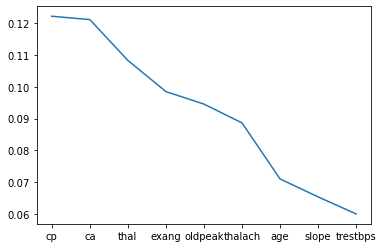

In [58]:
top.nlargest(9,keep='first').plot()

<AxesSubplot:>

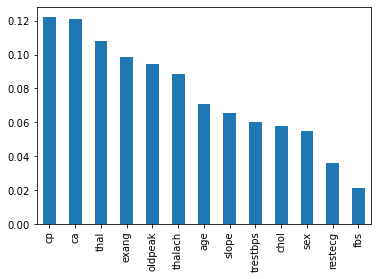

In [60]:
top.nlargest(13).plot(kind='bar')

<AxesSubplot:>

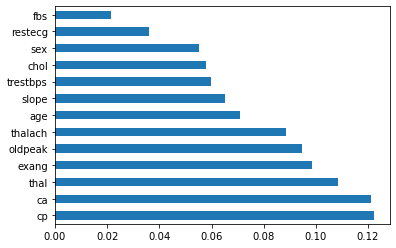

In [61]:
top.nlargest(13).plot(kind = 'barh')

<AxesSubplot:ylabel='Frequency'>

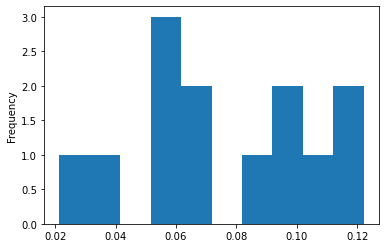

In [62]:
top.nlargest(13).plot(kind = 'hist')

<AxesSubplot:>

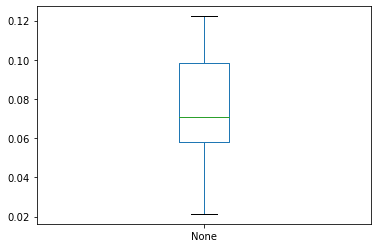

In [63]:
top.nlargest(13).plot(kind = 'box')

G:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='None'>

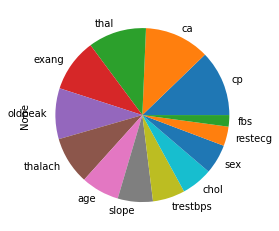

In [65]:
top.nlargest(1).plot(kind = 'pie')

# Training Data

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20,stratify= y)

# Sampling

In [67]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


resample = SMOTE()
x_train, y_train = resample.fit_resample(x_train, y_train)

In [68]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.333333,0,0,0.415094,0.251142,0,0,0.618321,1,0.032258,1,0,2
1,0.687500,0,0,0.433962,0.324201,0,0,0.679389,0,0.580645,0,2,2
2,0.562500,1,1,0.339623,0.216895,0,0,0.702290,0,0.000000,2,0,3
3,0.458333,1,3,0.292453,0.198630,0,0,0.412214,1,0.225806,2,1,2
4,0.479167,1,2,0.415094,0.221461,0,1,0.748092,0,0.000000,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.561719,1,0,0.459971,0.372552,0,0,0.473495,1,0.552912,1,2,3
244,0.664729,0,0,0.610792,0.273565,0,1,0.602995,1,0.143539,1,0,2
245,0.568921,1,0,0.526526,0.289153,0,0,0.377745,1,0.787173,0,0,3
246,0.645833,1,0,0.333694,0.197571,0,0,0.474285,1,0.395206,1,1,3


In [69]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
55,0.479167,1,1,0.377358,0.171233,0,1,0.664122,0,0.129032,2,1,2
100,0.270833,1,3,0.509434,0.269406,0,0,0.816794,0,0.129032,2,2,2
175,0.229167,1,0,0.150943,0.093607,0,0,0.328244,1,0.322581,1,0,3
37,0.520833,1,2,0.528302,0.242009,0,0,0.717557,0,0.258065,2,0,3
31,0.750000,1,0,0.245283,0.116438,0,1,0.526718,0,0.064516,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.354167,1,0,0.245283,0.280822,0,0,0.557252,0,0.129032,2,0,3
187,0.520833,1,0,0.283019,0.319635,0,0,0.290076,1,0.354839,1,1,3
135,0.416667,0,0,0.339623,0.326484,0,1,0.702290,0,0.000000,2,0,2
148,0.312500,1,2,0.245283,0.228311,0,1,0.748092,0,0.000000,2,0,2


In [70]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
243    0
244    0
245    0
246    0
247    0
Name: target, Length: 248, dtype: int64

In [71]:
y_test

55     1
100    1
175    0
37     1
31     1
      ..
270    0
187    0
135    1
148    1
272    0
Name: target, Length: 76, dtype: int64

In [72]:
Total_values = y_train.value_counts()
print(Total_values)

1    124
0    124
Name: target, dtype: int64


# CNN

In [73]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test)


# Setting Column Names from dataset
x_train.columns = x.columns
x_test.columns = x.columns

In [75]:
x_train = scaler.transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test)


# Setting Column Names from dataset
x_train.columns = x.columns
x_test.columns = x.columns

In [76]:
x_train.shape

(248, 13)

In [77]:
x_test.shape

(76, 13)

In [78]:
x_train.ndim

2

In [79]:
## Converting pandas dataframe to numpy array

x_cnn_train = x_train.to_numpy()
x_cnn_test = x_test.to_numpy()
y_cnn_test = y_test.to_numpy()
y_cnn_train = y_train.to_numpy()

In [80]:
x_train.shape

(248, 13)

In [81]:
## X_train is reshaped to 3-dimensional array because we have imported Conv1D which
## expects 3-D input. (455,30,1) means it has 455 rows (training) and 30 columns
## 1 means it is just one-channel data (Not an image).
x_cnn_train = x_cnn_train.reshape(248,13,1)
x_cnn_test = x_cnn_test.reshape(76,13,1)

In [82]:
x_cnn_train.ndim

3

In [83]:
epochs= 10

In [84]:
model = Sequential()

model.add(Conv1D(filters= 32, kernel_size= 2, activation = 'relu', input_shape = (13,1)))
model.add(BatchNormalization())
#model.add(MaxPool1D())  --- Pooling is bad for these kinds of data
model.add(Dropout(0.2))

model.add(Conv1D(filters= 64, kernel_size= 2 , activation= 'relu'))
model.add(BatchNormalization())
#model.add(MaxPool1D(1,1))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128, kernel_size= 2 , activation= 'relu'))
model.add(BatchNormalization())
#model.add(MaxPool1D(1,1))
model.add(Dropout(0.5))

model.add(Conv1D(filters= 256, kernel_size= 2 , activation= 'relu'))
model.add(BatchNormalization())
#model.add(MaxPool1D(1,1))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 128)           1

In [86]:
model.compile(optimizer = Adam(lr = 0.00005), loss = 'binary_crossentropy', metrics =['accuracy'])

In [87]:
history = model.fit(x_cnn_train, y_cnn_train, epochs= epochs, validation_data=(x_cnn_test, y_cnn_test), verbose=1)

Epoch 1/10
8/8 [==============================] - 7s 304ms/step - loss: 0.9461 - accuracy: 0.5731 - val_loss: 0.6860 - val_accuracy: 0.4474
Epoch 2/10
8/8 [==============================] - 0s 24ms/step - loss: 1.4220 - accuracy: 0.4426 - val_loss: 0.6758 - val_accuracy: 0.4868
Epoch 3/10
8/8 [==============================] - 0s 22ms/step - loss: 1.1602 - accuracy: 0.4859 - val_loss: 0.6588 - val_accuracy: 0.5789
Epoch 4/10
8/8 [==============================] - 0s 24ms/step - loss: 1.1291 - accuracy: 0.5185 - val_loss: 0.6437 - val_accuracy: 0.6842
Epoch 5/10
8/8 [==============================] - 0s 23ms/step - loss: 0.9519 - accuracy: 0.5876 - val_loss: 0.6323 - val_accuracy: 0.7237
Epoch 6/10
8/8 [==============================] - 0s 23ms/step - loss: 1.0443 - accuracy: 0.4950 - val_loss: 0.6240 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 0s 21ms/step - loss: 0.8615 - accuracy: 0.6355 - val_loss: 0.6154 - val_accuracy: 0.7632
Epoch 8/10
8/8 [==========

In [88]:
from sklearn.neural_network import MLPClassifier

In [89]:
mlp = MLPClassifier(max_iter = 500, activation = 'relu',random_state=None)
mlp

MLPClassifier(max_iter=500)

In [90]:
mlp.fit(x_train, y_train)

MLPClassifier(max_iter=500)

In [91]:
prediction = mlp.predict(x_test)


In [92]:
prediction

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [93]:
mlp.score(x_test, y_test)

0.7763157894736842

# ডাটা স্কেলিং

# MIN MAX SCALER

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
MMS = MinMaxScaler(feature_range=(0,1))

In [96]:
x_after_min_max_scaler = MMS.fit_transform(x)

In [97]:
x_after_min_max_scaler

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

# Standardisation

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
standardisation = StandardScaler()

In [100]:
standardisation.fit(x)

StandardScaler()

In [101]:
X_train = standardisation.transform(x_train)
X_test = standardisation.transform(x_test)

In [102]:
x_after_standardisation_scaler = standardisation.fit_transform(x)

In [103]:
x_after_standardisation_scaler

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# প্রেডিকশন-এর রেজাল্ট এনালাইসিস 

# Confusion Matrix

In [104]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,prediction))

[[24 11]
 [ 6 35]]


In [105]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        35
           1       0.76      0.85      0.80        41

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



# RandomForestClassifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rfc = RandomForestClassifier()

In [108]:
rfc.fit(x_test,y_test)

RandomForestClassifier()

In [109]:
rfc.score(x_test,y_test)

1.0

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc=RandomForestClassifier()
model3 = rfc.fit(x_train, y_train)
pred3 = model3.predict(x_test)
confusion_matrix(y_test, pred3)

array([[29,  6],
       [ 7, 34]], dtype=int64)

In [111]:
accuracy_score(y_test, pred3)

0.8289473684210527

In [112]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



# DecisionTreeClassifier

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
dtc = DecisionTreeClassifier()

In [115]:
dtc.fit(x_test,y_test)

DecisionTreeClassifier()

In [116]:
dtc.score(x_test,y_test)

1.0

In [117]:
model = dtc.fit(x_train,y_train)

In [118]:
pred=model.predict(x_test)
confusion_matrix(y_test,pred)

array([[21, 14],
       [10, 31]], dtype=int64)

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.6842105263157895

# LogisticRegression

In [120]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model2=lr.fit(x_train,y_train)
pred1=model2.predict(x_test)

In [121]:
from sklearn.metrics import confusion_matrix

cm1=confusion_matrix(y_test,pred1)
cm1

array([[29,  6],
       [ 4, 37]], dtype=int64)

In [122]:
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.868421052631579


In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred1)

0.868421052631579

In [124]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



# Naive Bayes classifier (GaussianNB)

In [125]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
model4 = NB.fit(x_train, y_train)
pred4 = model4.predict(x_test)
confusion_matrix(y_test, pred4)

array([[28,  7],
       [ 2, 39]], dtype=int64)

In [126]:
accuracy_score(y_test, pred4)

0.881578947368421

# KNeighborsClassifier

In [127]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model5 = KNN.fit(x_train, y_train)
pred5 = model5.predict(x_test)
confusion_matrix(y_test, pred5)

array([[25, 10],
       [12, 29]], dtype=int64)

In [128]:
accuracy_score(y_test, pred5)

0.7105263157894737

# Support vector machine(SVC -Support Vector Classifier)

In [129]:
from sklearn.svm import SVC
svm=SVC()
model6=svm.fit(x_train,y_train)
pred6=model6.predict(x_test)
confusion_matrix(y_test,pred6)

array([[25, 10],
       [ 7, 34]], dtype=int64)

In [130]:
accuracy_score(y_test, pred6)

0.7763157894736842

In [131]:
print('KNN :', accuracy_score(y_test, pred5))
print('lr :', accuracy_score(y_test, pred1))
print('dtc :', accuracy_score(y_test, pred))
print('rfc :', accuracy_score(y_test, pred3))
print('NB: ', accuracy_score(y_test, pred4))
print('SVC :', accuracy_score(y_test,pred6))

KNN : 0.7105263157894737
lr : 0.868421052631579
dtc : 0.6842105263157895
rfc : 0.8289473684210527
NB:  0.881578947368421
SVC : 0.7763157894736842
